# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

In [1]:
# 1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_variety = iris.target
data_ = data.loc[:,['sepal length (cm)','sepal width (cm)']]
data_

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
data_.corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [6]:
# 3. Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_, data_variety, test_size=0.25)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# 4. Постройте модель LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1,
       1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1])

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [10]:
lda.coef_

array([[-6.32346783,  8.05069413],
       [ 1.77119419, -3.71426409],
       [ 4.66058692, -4.26586055]])

In [11]:
lda.means_

array([[5.03243243, 3.45675676],
       [5.945     , 2.78      ],
       [6.62      , 2.98857143]])

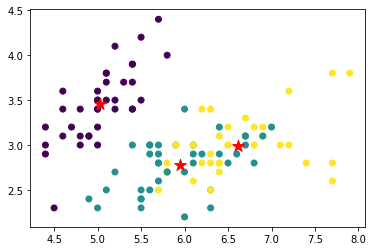

In [12]:
from matplotlib.pyplot import legend
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [13]:
# 5. Визуализируйте предсказания для тестовой выборки и центры классов
lda_test = LinearDiscriminantAnalysis()
lda_test.fit(X_test, y_test)
lda_test.means_

array([[4.93076923, 3.34615385],
       [5.9       , 2.73      ],
       [6.51333333, 2.94      ]])

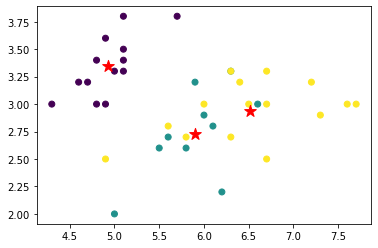

In [14]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda_test.means_[:, 0], lda_test.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [15]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

In [16]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)
lda_small.means_

array([[5.03243243, 3.45675676],
       [6.62      , 2.98857143]])

<ipython-input-17-045af6d61496>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


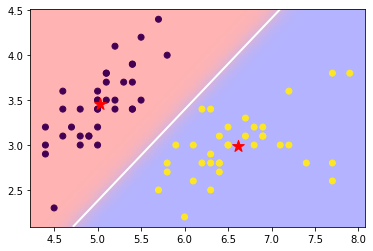

In [17]:
# Визуализируем на данных для обучения
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

"""Видим, что некоторые точки были классифицированы не правильно, попали за контурную линию другого класса"""
    
plt.show()

<ipython-input-18-ee1becbe9804>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


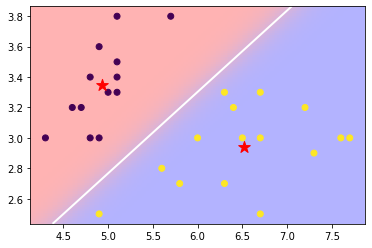

In [18]:
# Визуализируем на данных для тестирования
lda_small_test = LinearDiscriminantAnalysis()
lda_small_test.fit(small_test, sy_test)
lda_small_test.means_
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
# центроиды
plt.scatter(lda_small_test.means_[:, 0], lda_small_test.means_[:, 1], c='r', s=150, marker='*')
# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
# предсказываем класс каждой точки нашей сетки
Z = lda_small_test.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
"""Несмотря на тренировочную схему, при визуализации на тестовых данных, видно четкое разделение классов. 
Оба признака влияют на сорт цветка"""
plt.show()

In [19]:
accuracy_score(sy_test, lda.predict(small_test))

0.8214285714285714

In [20]:
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# Строим модель логистической регресии
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(small_train, sy_train)
lr.predict(small_test)
accuracy_score(sy_test, lr.predict(small_test))

0.9642857142857143

In [21]:
lr.coef_

array([[ 3.02721666, -1.73426998]])

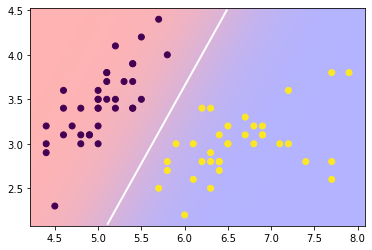

In [22]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

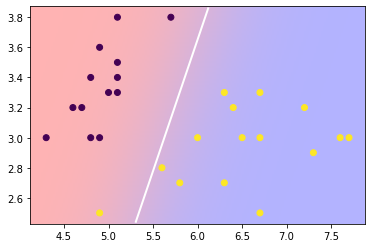

In [23]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [24]:
# 7.Подберите оптимальное число кластеров для алгоритма kmeans и 
# визуализируйте полученную кластеризацию 

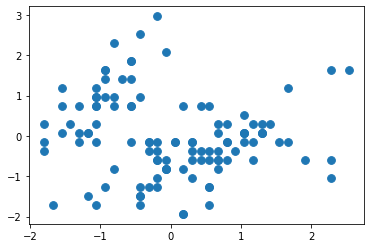

In [25]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# обучаем StandardScaler  на тренировочных данных X_train 
X_scaled = scaler.fit_transform(X_train)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [26]:
from sklearn.cluster import KMeans

In [27]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

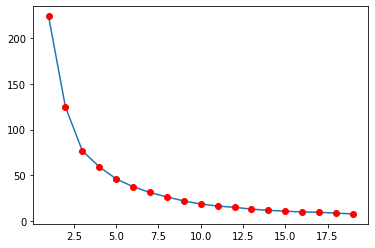

In [28]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [29]:
# указываем количество кластеров согласно графика локтя (3 кластера)
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2,
       0, 1])

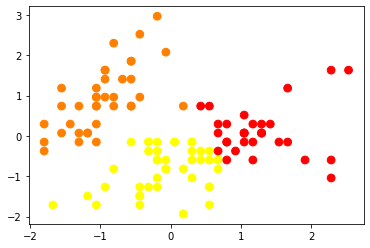

In [30]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [31]:
"""Согласно вышеуказанной визуализации, показано явное деление на 3 класса"""

'Согласно вышеуказанной визуализации, показано явное деление на 3 класса'

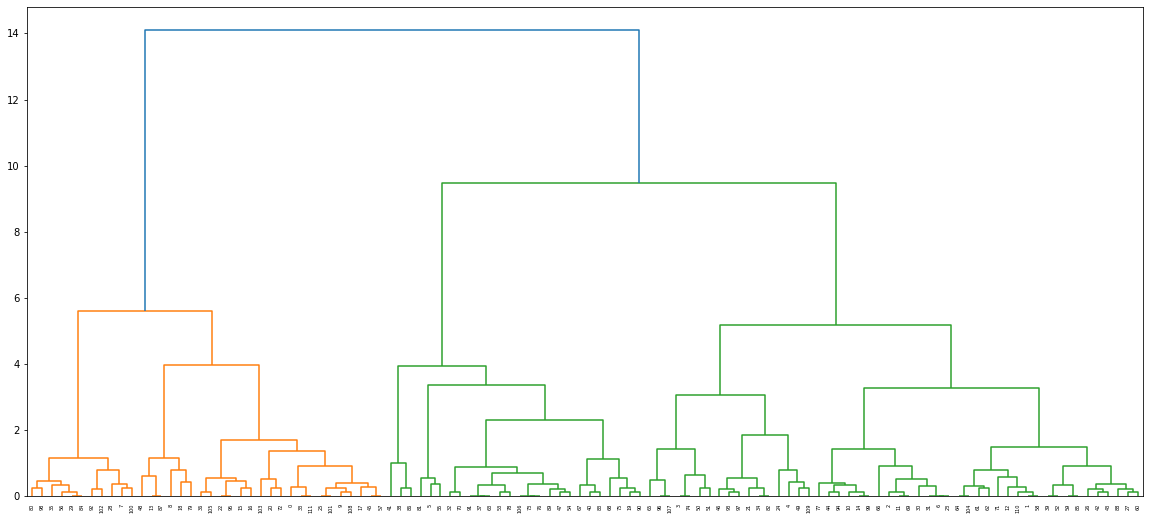

In [32]:
# Для интереса, Иерархическая кластеризация
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [33]:
"""Согласно ирархической кластеризации, показано также явное деление на 3 класса"""

'Согласно ирархической кластеризации, показано также явное деление на 3 класса'